<a href="https://colab.research.google.com/github/bugsfreak/HMM/blob/main/HMMRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Librerias importadas para la lectura del dataset y manejor de arrays
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
!pip install hmmlearn
from hmmlearn import hmm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#Lectura del dataset
dsRoom = pd.read_csv('RoomOccupancy.csv')
#Muestra de datos
dsRoom

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [51]:
#Busca si existen datos nulos en dataset
dsRoom.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [52]:
#Librerias para la división del dataset y el escalamiento
VarEntrada = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
VarObjetivo = ['Occupancy']
X = dsRoom[VarEntrada]
y = dsRoom[VarObjetivo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X_train.shape, X_test.shape

((1865, 5), (800, 5))

In [53]:
scaler = StandardScaler()

scaler.fit(X_train)

# Transofmar es escalado a partir 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

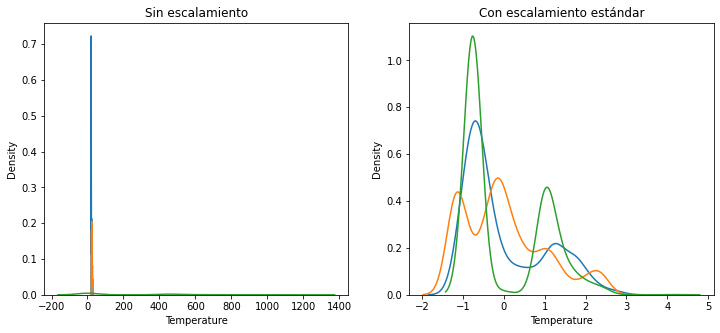

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Sin escalamiento')
sns.kdeplot(X_train['Temperature'], ax=ax1)
sns.kdeplot(X_train['Humidity'], ax=ax1)
sns.kdeplot(X_train['Light'], ax=ax1)

# after scaling
ax2.set_title('Con escalamiento estándar')
sns.kdeplot(X_train_scaled['Temperature'], ax=ax2)
sns.kdeplot(X_train_scaled['Humidity'], ax=ax2)
sns.kdeplot(X_train_scaled['Light'], ax=ax2)
plt.show()

In [69]:
#Se aplica 
HMM = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 150, random_state = 2)

HMM.fit(X_train_scaled)

y_pred = HMM.predict(X_test_scaled)
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 0 

In [70]:

accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('El accuracy del modelo es: ' , accuracy , '%')

El accuracy del modelo es:  89.0 %


In [71]:
precision = metrics.precision_score(y_test,y_pred)*100
print('La precisión del modelo es: ' , accuracy , '%')

La precisión del modelo es:  89.0 %


Fuente: https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7
